0
1
2
3
4
5
6
7
8
9


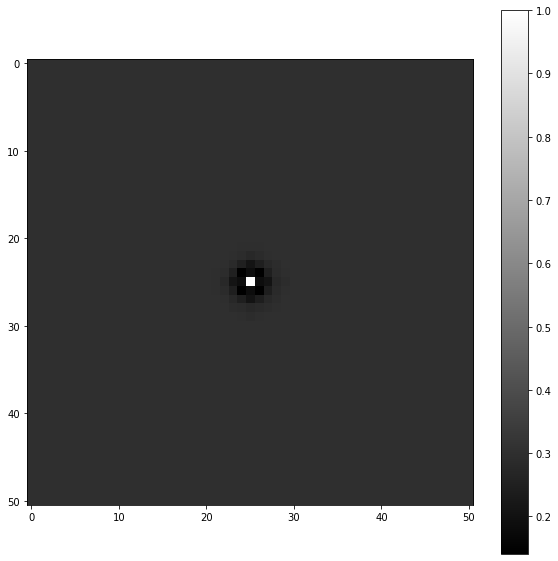

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def Update(grid,beta,alfa):
    #NewGrid = grid
    for i in range(1,N-1):
        for j in range(1,N-1):
                stato = classificazione(i,j,grid)
                if(stato == 'Solid'):
                    continue 
                sU= classificazione(i+1,j,grid)
                sD= classificazione(i-1,j,grid)
                sL= classificazione(i,j-1,grid)
                sR= classificazione(i,j+1,grid)
                
                if(sU=='Liquid'):
                    wU=1
                else :
                    wU = 0
                if(sD == 'Liquid'):
                    wD=1
                else :
                    wD = 0 
                if(sL=='Liquid'):
                    wL=1
                else :
                    wL = 0 
                if(sR=='Liquid'):
                    wR=1
                else :
                    wR = 0 
                
            
                D = -0.5*grid[i,j] + 1./8 * ( wU*grid[i+1,j]
                                              +wD*grid[i-1,j]
                                              +wL*grid[i,j-1]
                                              +wR*grid[i,j+1]
                                             ) #diffusione
                if( stato == 'QuasiSolid') :
                    
                    grid[i,j]= grid[i,j]+ beta + alfa*D
                if(stato=='Liquid'):
                    grid[i,j] = grid[i,j] + alfa*D #ho sostituito NewGrid con grid
    #grid = NewGrid
                    
                    
                
                   
                    
                
    
          

def classificazione(X,Y,grid):
    if (grid[X,Y]==1 ) : 
        return 'Solid'
    if ( X+1 != N and Y+1 != N and X != 0 and Y != 0):
        pv1 = grid[X+1,Y]
        pv2 =grid[X-1,Y]
        pv3 = grid[X,Y+1]
        pv4 =grid[X,Y-1]
    else: 
        if (X+1 == N ):
            pv1 = -1
            pv2 =grid[X-1,Y]
            if(Y+1 == N):
                pv3 = -1
            else:
                pv3 = grid[X,Y+1]
            if(Y == 0):
                pv4 = -1
            else:
                pv4 =grid[X,Y-1]
        if (Y+1 == N):
            if (X+1==N):
                pv1=-1
            else:
                pv1 = grid[X+1,Y]
            if(X==0):
                pv2=-1
            else:
                pv2 =grid[X-1,Y]
            pv3 = -1
            pv4 =grid[X,Y-1]
        if (Y == 0):
            if (X+1==N):
                pv1=-1
            else: 
                pv1 = grid[X+1,Y]
            if (X==0):
                pv2=-1
            else:
                pv2 =grid[X-1,Y]
            pv3 = grid[X,Y+1]
            pv4 = -1
        if (X==0): 
            pv1 = grid[X+1,Y]
            pv2 = -1
            if (Y+1==N):
                pv3=-1
            else:
                pv3 = grid[X,Y+1]
            if(Y==0):
                pv4=-1
            else:
                pv4 = grid[X,Y-1]
        
        
    if (grid[X,Y]<1 and (pv1==1 or pv2==1 or pv3==1 or pv4==1) ) : 
        return 'QuasiSolid'
    
    else : 
        return 'Liquid'
    
#MAIN
N = 51 #numero di pixel per asse della griglia
#Ng = 1  #NUMERO INIZIALE DI GERMI DI CRESCITA
T = 10  #numero di step di aggiornamento, tempo fisico della simulazione
dim = [N,N] #dimensioni della griglia di simulazione
I0=0.3 #parametri del modello 
alfa= 0.5
beta=0.01
grid = I0*np.ones(dim) #griglia di simulazione
X0 = int( (N-1)/2 )    #inizializzazione
Y0 = int( (N-1)/2 )
grid[X0,Y0]=1

#print (grid)

#for i in range(N):
       # for j in range (N):
for t in range(T):          # print(classificazione(i,j,grid))
    Update(grid,beta,alfa)
    print(t)
   # print(grid)
plt.figure(figsize=(10,10))
plt.imshow(grid,cmap=cm.gray) 
plt.colorbar()
plt.show()

##### 